In [99]:
import pandas as pd
import os

import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

import matplotlib.pyplot as plt

import preprocessing as process

# Model
import tensorflow as tf
from tensorflow.python import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV

In [324]:
seed = 42

## Define Functions

## Import Data

In [2]:
df = pd.read_csv("train.csv")

In [ ]:
df.info()

In [ ]:
df

## Clean Data

In [3]:
cache = set(stopwords.words('english'))

In [5]:
df_1 = process.clean(df, "abstract", cache)

In [39]:
df_2 = df_1[['id', 'abstract', 'judgement']]

In [41]:
df_2

,id,abstract,judgement
0,0,Longitudinal studies indicate declines cogniti...,0
1,1,The present study undertaken validate measurem...,0
2,2,Objective To report case series basal ganglia ...,0
3,3,The etiology pathogenesis idiopathic chronic-i...,0
4,4,,0
...,...,...,...
27140,27140,Amyloid beta-protein A beta main constituent s...,0
27141,27141,We present review current technological progre...,0
27142,27142,Phosphorylation Tau serine 422 promotes Tau ag...,0
27143,27143,The ability label dihydroxyphenylalanine DOPA ...,0


## Create Model

In [9]:
# def create_model():
#     model = tf.keras.Sequential([
#         tf.keras.layers.Embedding(88587, 64),
#         tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
#         tf.keras.layers.Dropout(0.2),
#         tf.keras.layers.Dense(64,activation="relu"),
#         tf.keras.layers.Dense(1,activation='sigmoid')
#     ])
    
#     return model

In [10]:
# model = create_model()

In [11]:
# model.summary()

## Convert list to string (since Keras doesnt accept list)

In [36]:
df_3 = df_2
df_3["abstract"] = df_3['abstract'].apply(lambda x: " ".join(x))

<ipython-input-36-886f1af62b29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3["abstract"] = df_3['abstract'].apply(lambda x: " ".join(x))


In [203]:
train_df_3 = df_3
train_df_3

,id,abstract,judgement
0,0,Longitudinal studies indicate declines cogniti...,0
1,1,The present study undertaken validate measurem...,0
2,2,Objective To report case series basal ganglia ...,0
3,3,The etiology pathogenesis idiopathic chronic-i...,0
4,4,,0
...,...,...,...
27140,27140,Amyloid beta-protein A beta main constituent s...,0
27141,27141,We present review current technological progre...,0
27142,27142,Phosphorylation Tau serine 422 promotes Tau ag...,0
27143,27143,The ability label dihydroxyphenylalanine DOPA ...,0


In [202]:
test_df_3

,id,abstract
0,27145,The objective paper analyse changes food commo...
1,27146,
2,27147,15O -water PET performed 12 patients structura...
3,27148,We present method significantly improves magne...
4,27149,The objective study compare epidemiological va...
...,...,...
40829,67974,In current outbreak novel coronavirus COVID-19...
40830,67975,BACKGROUND As novel SARS-CoV-2 pandemic occurr...
40831,67976,Positron emission tomography PET imaging modal...
40832,67977,


## Vectorize sentence

In [94]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [270]:
count_vectorizer = CountVectorizer()
X_train_vectors = count_vectorizer.fit_transform(train_df_3['abstract'])
y_train_vectors = train_df_3['judgement'].values
X_test_vectors = count_vectorizer.transform(test_df_3["abstract"])

In [271]:
X_train_vectors.shape

(27145, 67055)

In [211]:
y_train_vectors.shape

(27145,)

In [269]:
X_test_vectors.shape

(40834, 67055)

In [93]:
# count_vectorizer = CountVectorizer(min_df=0, lowercase=False)
# train_vectors = count_vectorizer.fit_transform(df_3["abstract"])
# test_vectors = count_vectorizer.fit_transform(test_df_3["abstract"])

In [97]:
# tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
# train_tfidf = tfidf.fit_transform(df_3['abstract'])
# test_tfidf = tfidf.transform(test_df_3["abstract"])

## Train Test Split

In [212]:
X_train_sv, X_val_sv, y_train_sv, y_val_sv = train_test_split(X_train_vectors, y_train_vectors, test_size=0.25, random_state=42)

In [143]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [213]:
X_train_sv.shape

(20358, 67055)

In [214]:
X_val_sv.shape

(6787, 67055)

In [215]:
y_train_sv.shape

(20358,)

In [216]:
y_val_sv.shape

(6787,)

## A. Training the Model (Logistic Regression)

In [219]:
from sklearn.pipeline import Pipeline

logReg_clf = LogisticRegression()

logReg_model = Pipeline(steps = [("classifier", logReg_clf)])

In [220]:
logReg_model.fit(X_train_sv, y_train_sv)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('classifier', LogisticRegression())])

In [221]:
# model.fit - train the model using X train data on y train data
# model.score - accuracy when trained model is tested on X validation data and y validation data
# model.predict - 

In [222]:
score = logReg_model.score(X_val_sv, y_val_sv)

print("Accuracy:", score)

Accuracy: 0.981140415500221


## B. Training Model (Naives Bayes)

In [273]:
# Fitting a simple Naive Bayes on Counts
naiveBayes_model = MultinomialNB()

In [274]:
naiveBayes_model.fit(X_train_sv, y_train_sv)

MultinomialNB()

In [275]:
score = naiveBayes_model.score(X_val_sv, y_val_sv)

print("Accuracy:", score)

Accuracy: 0.9812877560041255


## C. Training Model (XGBoost)

In [327]:
import xgboost as xgb
clf_xgb = xgb.XGBClassifier(max_depth=7,
                            n_estimators=200,
                            colsample_bytree=0.8,
                            subsample=0.8,
                            nthread=10,
                            learning_rate=0.1,
                            random_state = seed)

In [328]:
clf_xgb.fit(X_train_sv, y_train_sv)

[23:35:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=10, nthread=10, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [329]:
score = clf_xgb.score(X_val_sv, y_val_sv)

print("Accuracy:", score)

Accuracy: 0.9826138205392663


## D. Training Model (Random Forest)

In [323]:
from sklearn.ensemble import RandomForestClassifier

In [349]:
rf_clf = RandomForestClassifier(n_estimators=500,
                                random_state = seed)

In [350]:
rf_model = Pipeline(steps = [("classifier", rf_clf)])

In [351]:
rf_model.fit(X_train_sv, y_train_sv)

Pipeline(steps=[('classifier',
                 RandomForestClassifier(n_estimators=500, random_state=42))])

In [347]:
score = rf_model.score(X_val_sv, y_val_sv)

print("Accuracy:", score)

Accuracy: 0.9762781788713717


## E. Traning Model (Linear Support Vector Classification)

In [353]:
from sklearn.svm import LinearSVC

In [374]:
svc_clf = LinearSVC(max_iter = 1000,
                    random_state = seed)

In [375]:
svc_clf.fit(X_train_sv, y_train_sv)

LinearSVC(random_state=42)

In [376]:
score = svc_clf.score(X_val_sv, y_val_sv)

print("Accuracy:", score)

Accuracy: 0.9795196699572712


## F. Training Model (Extra Trees Classifier)

In [379]:
from sklearn.ensemble import ExtraTreesClassifier

In [380]:
et_clf = ExtraTreesClassifier(n_estimators = 200,
                              random_state = seed)

In [381]:
et_clf.fit(X_train_sv, y_train_sv)

ExtraTreesClassifier(n_estimators=200, random_state=42)

In [382]:
score = et_clf.score(X_val_sv, y_val_sv)

print("Accuracy:", score)

Accuracy: 0.9761308383674672


## Confusion Matrix

<img src = "confusionmatrix.png" style="width:300px;height:200px/">

In [369]:
# Logistic Regression
y_pred_lg_val = logReg_model.predict(X_val_sv)
a,b,c,d = confusion_matrix(y_val_sv, y_pred_lg_val).ravel()
print(a, b)
print(c, d)
print("correct:",str(a+d), "incorrect:",str(b+c))

6595 31
97 64
correct: 6659 incorrect: 128


In [370]:
# Naives Bayes
y_pred_naive_val = naiveBayes_model.predict(X_val_sv)
a,b,c,d = confusion_matrix(y_val_sv, y_pred_naive_val).ravel()
print(a, b)
print(c, d)
print("correct:",str(a+d), "incorrect:",str(b+c))

6599 27
100 61
correct: 6660 incorrect: 127


In [371]:
# XGBoost
y_pred_xgb_val = clf_xgb.predict(X_val_sv)
a,b,c,d = confusion_matrix(y_val_sv, y_pred_xgb_val).ravel()
print(a, b)
print(c, d)
print("correct:",str(a+d), "incorrect:",str(b+c))

6615 11
107 54
correct: 6669 incorrect: 118


In [372]:
# Random Forest
y_pred_rf_val = rf_model.predict(X_val_sv)
a,b,c,d = confusion_matrix(y_val_sv, y_pred_rf_val).ravel()
print(a, b)
print(c, d)
print("correct:",str(a+d), "incorrect:",str(b+c))

6626 0
161 0
correct: 6626 incorrect: 161


In [377]:
# Support Vector Classification
y_pred_svc_val = svc_clf.predict(X_val_sv)
a,b,c,d = confusion_matrix(y_val_sv, y_pred_svc_val).ravel()
print(a, b)
print(c, d)
print("correct:",str(a+d), "incorrect:",str(b+c))

6580 46
93 68
correct: 6648 incorrect: 139


In [383]:
# Extra Trees Classifier
y_pred_et_val = et_clf.predict(X_val_sv)
a,b,c,d = confusion_matrix(y_val_sv, y_pred_et_val).ravel()
print(a, b)
print(c, d)
print("correct:",str(a+d), "incorrect:",str(b+c))

6625 1
161 0
correct: 6625 incorrect: 162


## X. Training the Model (Sequential Model)

In [264]:
input_dim = X_train_vectors.shape[1]  # Number of features

seq_model = Sequential()
seq_model.add(tf.keras.layers.Dense(10, input_dim=input_dim, activation='relu'))
seq_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [265]:
seq_model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
seq_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                670560    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 670,571
Trainable params: 670,571
Non-trainable params: 0
_________________________________________________________________


In [272]:
# history = seq_model.fit(X_train_vectors,
#                         y_train_vectors,
#                         epochs=1,
#                         batch_size=128,
#                         shuffle = True)

In [144]:
# loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_val, y_val, verbose=False)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9954
Testing Accuracy:  0.9826


In [145]:
# def plot_history(history):
#     acc = history.history['accuracy']
#     val_acc = history.history['val_accuracy']
#     loss = history.history['loss']
#     val_loss = history.history['val_loss']
#     x = range(1, len(acc) + 1)

#     plt.figure(figsize=(12, 5))
#     plt.subplot(1, 2, 1)
#     plt.plot(x, acc, 'b', label='Training acc')
#     plt.plot(x, val_acc, 'r', label='Validation acc')
#     plt.title('Training and validation accuracy')
#     plt.legend()
#     plt.subplot(1, 2, 2)
#     plt.plot(x, loss, 'b', label='Training loss')
#     plt.plot(x, val_loss, 'r', label='Validation loss')
#     plt.title('Training and validation loss')
#     plt.legend()

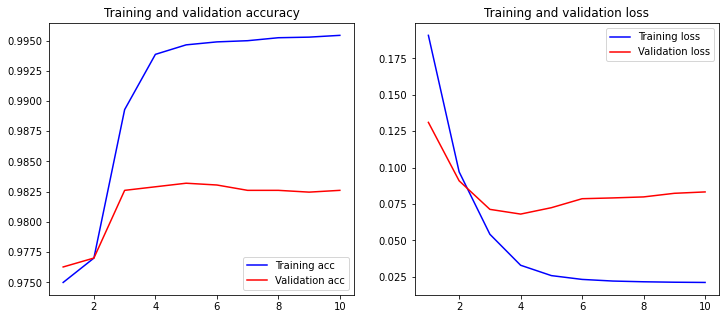

In [146]:
# plot_history(history)

## Import Test Data

In [68]:
test_df = pd.read_csv("test.csv")

In [70]:
test_df_1 = process.clean(test_df, "abstract", cache)

In [72]:
test_df_2 = test_df_1[['id', 'abstract']]

In [74]:
test_df_3 = test_df_2

In [75]:
test_df_3["abstract"] = test_df_3['abstract'].apply(lambda x: " ".join(x))

<ipython-input-75-c3bbac7ff368>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_3["abstract"] = test_df_3['abstract'].apply(lambda x: " ".join(x))


In [92]:
test_df_3

,id,abstract
0,27145,The objective paper analyse changes food commo...
1,27146,
2,27147,15O -water PET performed 12 patients structura...
3,27148,We present method significantly improves magne...
4,27149,The objective study compare epidemiological va...
...,...,...
40829,67974,In current outbreak novel coronavirus COVID-19...
40830,67975,BACKGROUND As novel SARS-CoV-2 pandemic occurr...
40831,67976,Positron emission tomography PET imaging modal...
40832,67977,


In [77]:
X_test_temp = test_df_3["abstract"].values

In [78]:
vectorizer.fit(X_test_temp)

X_test = vectorizer.transform(X_test_temp)

## Submission

In [298]:
submission = pd.read_csv("sample_submit.csv", names = ['id', 'pred'])

In [299]:
submission

,id,pred
0,27145,0
1,27146,1
2,27147,1
3,27148,0
4,27149,1
...,...,...
40829,67974,0
40830,67975,0
40831,67976,0
40832,67977,0


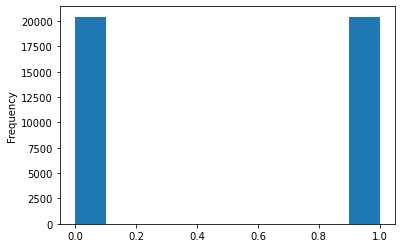

In [300]:
ax_ = submission["pred"].plot.hist()

### Submission using Logistic Regression (logReg_model)

In [239]:
submission["pred"] = logReg_model.predict(X_test_vectors)

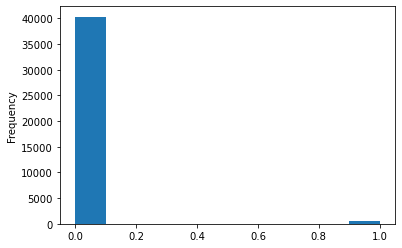

In [251]:
ax = submission["pred"].plot.hist()

In [256]:
submission.to_csv("submission_lr.csv", header = False, index=False)

### Submission using Naives Bayes Classifier (naiveBayes_model)

In [301]:
submission["pred"] = naiveBayes_model.predict(X_test_vectors)

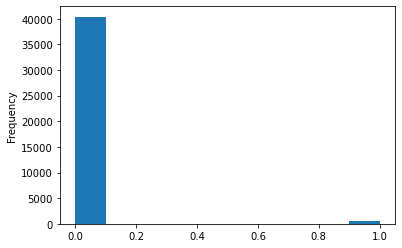

In [302]:
ax2 = submission["pred"].plot.hist()

In [303]:
submission.to_csv("submission_naive.csv", header = False, index=False)

### Submission using XGBoost (clf_xgb)

In [295]:
submission["pred"] = clf_xgb.predict(X_test_vectors)

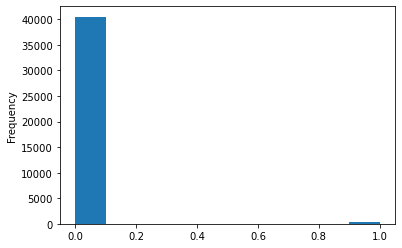

In [296]:
ax3 = submission["pred"].plot.hist()

In [297]:
submission.to_csv("submission_xgb.csv", header = False, index=False)